In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
import json

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [78]:
url  = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city = "london"

In [80]:
query_url = url + "&q=" +city

In [81]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [82]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [83]:
weather_json.get("main")

{'temp': 85.35,
 'feels_like': 81.46,
 'temp_min': 84.2,
 'temp_max': 87.8,
 'pressure': 1011,
 'humidity': 37}

In [52]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
import json

In [53]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [56]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 12 of Set 13 | bluff
Processing Record 13 of Set 13 | meihekou
Processing Record 14 of Set 13 | alice springs
Processing Record 15 of Set 13 | port hardy
Processing Record 16 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 13 | lasa
Processing Record 18 of Set 13 | tapaua
City not found. Skipping...
Processing Record 19 of Set 13 | laguna
Processing Record 20 of Set 13 | dikson
Processing Record 21 of Set 13 | one hundred mile house
City not found. Skipping...
Processing Record 22 of Set 13 | new norfolk
Processing Record 23 of Set 13 | albany
Processing Record 24 of Set 13 | sabang
Processing Record 25 of Set 13 | ushuaia
Processing Record 26 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 27 of Set 13 | cape town
Processing Record 28 of Set 13 | durgapur
Processing Record 29 of Set 13 | taoudenni
Processing Record 30 of Set 13 | hobart
Processing Record 31 of Set 13 | rikitea
Processing Record 32 of Set 13 | herm

Processing Record 32 of Set 16 | sitka
Processing Record 33 of Set 16 | souillac
Processing Record 34 of Set 16 | khatanga
Processing Record 35 of Set 16 | oranjemund
Processing Record 36 of Set 16 | paramirim
Processing Record 37 of Set 16 | assiniboia
Processing Record 38 of Set 16 | valparaiso
Processing Record 39 of Set 16 | bourg-les-valence
Processing Record 40 of Set 16 | huilong
Processing Record 41 of Set 16 | lavrentiya
Processing Record 42 of Set 16 | rocha
Processing Record 43 of Set 16 | samana
Processing Record 44 of Set 16 | mecca
Processing Record 45 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 16 | luwuk
Processing Record 47 of Set 16 | mpongwe
Processing Record 48 of Set 16 | jalu
Processing Record 49 of Set 16 | terrace
Processing Record 50 of Set 16 | necochea
Processing Record 1 of Set 17 | stephenville
Processing Record 2 of Set 17 | sokolovo
Processing Record 3 of Set 17 | ostrovnoy
Processing Record 4 of Set 17 | isangel
Proces

Processing Record 19 of Set 20 | senanga
Processing Record 20 of Set 20 | tangkak
Processing Record 21 of Set 20 | utiroa
City not found. Skipping...
Processing Record 22 of Set 20 | purmerend
Processing Record 23 of Set 20 | tigri
City not found. Skipping...
Processing Record 24 of Set 20 | benguela
Processing Record 25 of Set 20 | haibowan
City not found. Skipping...
Processing Record 26 of Set 20 | dumas
Processing Record 27 of Set 20 | kuching
Processing Record 28 of Set 20 | sechura
Processing Record 29 of Set 20 | bad munstereifel
Processing Record 30 of Set 20 | sinnamary
Processing Record 31 of Set 20 | vostok
Processing Record 32 of Set 20 | rawson
Processing Record 33 of Set 20 | ribeira grande
Processing Record 34 of Set 20 | abilene
Processing Record 35 of Set 20 | kamen-na-obi
Processing Record 36 of Set 20 | trelew
Processing Record 37 of Set 20 | palembang
Processing Record 38 of Set 20 | matara
Processing Record 39 of Set 20 | gimli
Processing Record 40 of Set 20 | zhob

Processing Record 50 of Set 23 | mount isa
Processing Record 1 of Set 24 | barra do garcas
Processing Record 2 of Set 24 | ilulissat
Processing Record 3 of Set 24 | sao goncalo do amarante
Processing Record 4 of Set 24 | oak ridge
Processing Record 5 of Set 24 | port-gentil
Processing Record 6 of Set 24 | joshimath
Processing Record 7 of Set 24 | oistins
Processing Record 8 of Set 24 | taltal
Processing Record 9 of Set 24 | sivaki
Processing Record 10 of Set 24 | mwene-ditu
Processing Record 11 of Set 24 | cockburn town
Processing Record 12 of Set 24 | maragheh
Processing Record 13 of Set 24 | maldonado
Processing Record 14 of Set 24 | bowling green
Processing Record 15 of Set 24 | eregli
Processing Record 16 of Set 24 | san borja
Processing Record 17 of Set 24 | hluti
Processing Record 18 of Set 24 | omboue
Processing Record 19 of Set 24 | klaksvik
Processing Record 20 of Set 24 | zhumadian
Processing Record 21 of Set 24 | bolungarvik
City not found. Skipping...
Processing Record 22 o

In [57]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,50.13,88,82,4.21,NZ,2020-07-31 10:20:00
1,Meihekou,42.53,125.68,79.61,70,31,10.04,CN,2020-07-31 10:20:00
2,Alice Springs,-23.70,133.88,62.60,14,0,6.93,AU,2020-07-31 10:15:10
3,Port Hardy,50.70,-127.42,58.26,85,12,1.36,CA,2020-07-31 10:20:00
4,Lasa,46.62,10.70,78.01,68,40,8.05,IT,2020-07-31 10:20:01
5,Laguna,38.42,-121.42,62.01,77,1,6.93,US,2020-07-31 10:19:42
6,Dikson,73.51,80.55,56.80,63,91,17.81,RU,2020-07-31 10:20:01
7,New Norfolk,-42.78,147.06,54.00,79,100,3.11,AU,2020-07-31 10:20:01
8,Albany,42.60,-73.97,63.00,79,100,3.00,US,2020-07-31 10:20:01
9,Sabang,5.89,95.32,82.89,77,74,18.59,ID,2020-07-31 10:17:03


In [58]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [59]:
organized_df = city_data_df[ ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] ]
organized_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2020-07-31 10:20:00,-46.60,168.33,50.13,88,82,4.21
1,Meihekou,CN,2020-07-31 10:20:00,42.53,125.68,79.61,70,31,10.04
2,Alice Springs,AU,2020-07-31 10:15:10,-23.70,133.88,62.60,14,0,6.93
3,Port Hardy,CA,2020-07-31 10:20:00,50.70,-127.42,58.26,85,12,1.36
4,Lasa,IT,2020-07-31 10:20:01,46.62,10.70,78.01,68,40,8.05


In [60]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
organized_df.to_csv(output_data_file, index_label="City_ID")

In [61]:
# Import the time module.
import time
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

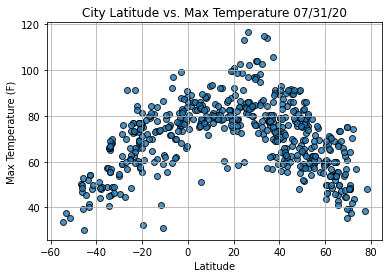

In [62]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

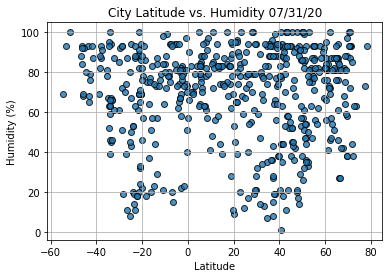

In [63]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

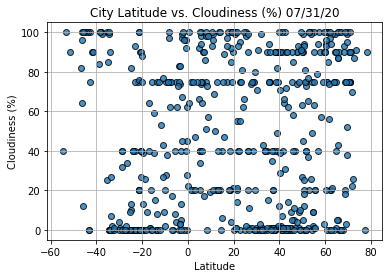

In [64]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

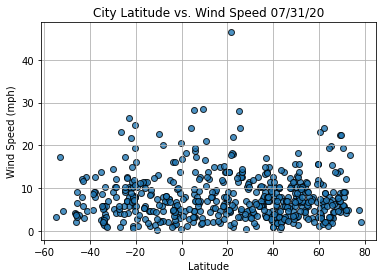

In [65]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [66]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [67]:
index13 = organized_df.loc[13]
index13

City                    Taoudenni
Country                        ML
Date          2020-07-31 10:20:02
Lat                         22.68
Lng                         -3.98
Max Temp                   102.65
Humidity                       20
Cloudiness                      0
Wind Speed                  17.98
Name: 13, dtype: object

In [68]:
northern_hemi_df = organized_df.loc[(organized_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Meihekou,CN,2020-07-31 10:20:00,42.53,125.68,79.61,70,31,10.04
3,Port Hardy,CA,2020-07-31 10:20:00,50.70,-127.42,58.26,85,12,1.36
4,Lasa,IT,2020-07-31 10:20:01,46.62,10.70,78.01,68,40,8.05
5,Laguna,US,2020-07-31 10:19:42,38.42,-121.42,62.01,77,1,6.93
6,Dikson,RU,2020-07-31 10:20:01,73.51,80.55,56.80,63,91,17.81


In [69]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = organized_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = organized_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Meihekou,CN,2020-07-31 10:20:00,42.53,125.68,79.61,70,31,10.04
3,Port Hardy,CA,2020-07-31 10:20:00,50.70,-127.42,58.26,85,12,1.36
4,Lasa,IT,2020-07-31 10:20:01,46.62,10.70,78.01,68,40,8.05
5,Laguna,US,2020-07-31 10:19:42,38.42,-121.42,62.01,77,1,6.93
6,Dikson,RU,2020-07-31 10:20:01,73.51,80.55,56.80,63,91,17.81
...,...,...,...,...,...,...,...,...,...
544,Reading,GB,2020-07-31 10:21:18,51.46,-0.97,86.00,35,0,13.87
545,Shaunavon,CA,2020-07-31 10:21:18,49.65,-108.42,64.85,86,63,6.69
546,Terrace Bay,CA,2020-07-31 10:21:18,48.78,-87.10,55.15,91,0,3.53
547,Ossora,RU,2020-07-31 10:21:18,59.24,163.07,54.88,90,75,10.92


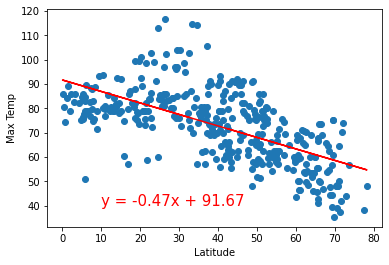

In [70]:
from scipy.stats import linregress
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(10,40))

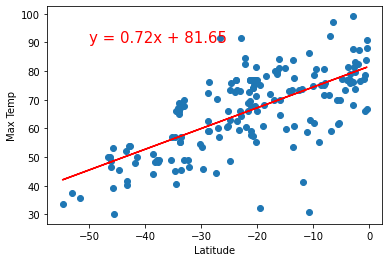

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n'
                        for 'Maximum Temperature''', 'Max Temp',(-50,90))

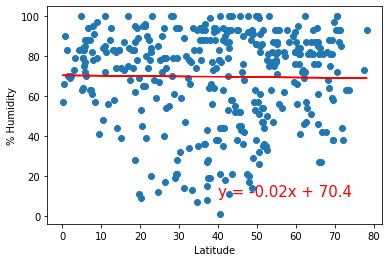

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Humidity''', '% Humidity',(40,10))

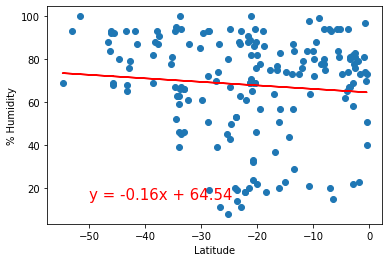

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Humidity''', '% Humidity',(-50,15))

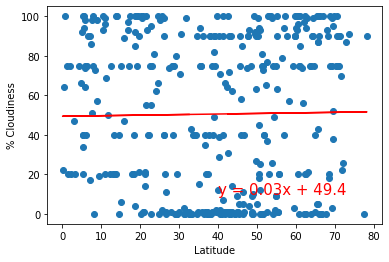

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(40,10))

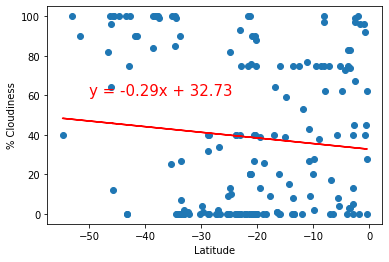

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(-50,60))

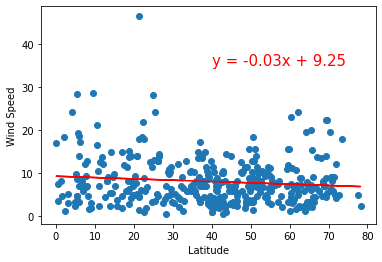

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(40,35))

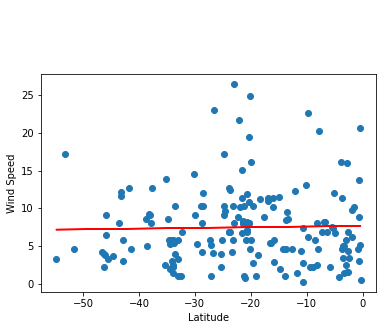

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(-50,35))